In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from scipy.spatial.distance import squareform, pdist

sns.set(style='whitegrid', context='notebook', palette='Set2')

In [74]:
# read CSV
df_data  = pd.read_csv('../../data/sample.csv')
df_data = df_data[df_data.frame < 1000]
df_data = df_data.drop(columns=['wy'])
df_data = df_data.sort_values(by=['id', 'frame'])
df_data['new_frame'] = df_data['frame']/20
df_data['new_frame'] = df_data['new_frame'].astype(np.int64)

In [89]:
df_data = df_data.drop_duplicates(subset=['wx', 'wz', 'frame'])
df_data = df_data.groupby(['id', 'new_frame']).mean()
df_data = df_data.reset_index()

In [90]:
df_velocity = pd.DataFrame()
for i in range(max(df_data['id'])):
    person = df_data[df_data.id == i]
    person_diff = person.diff().fillna(0.)
    person_diff['dist'] = np.sqrt(person_diff.wx**2 + person_diff.wz**2)
    person_diff['vel'] = person_diff.dist / (person_diff.frame / 30)
    df_velocity = df_velocity.append(person_diff)

In [91]:
df_data['vel'] = df_velocity['vel']
df_data['dist'] = df_velocity['dist']

/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


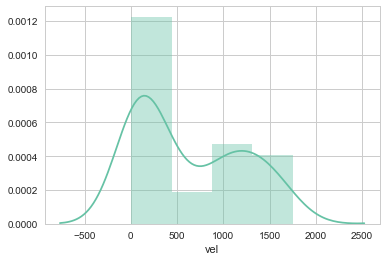

In [92]:
df_dataset = df_data.dropna()
sns.distplot(df_dataset['vel'])

In [297]:
df_dataset = df_dataset.reset_index()

In [298]:
df_minD = pd.DataFrame()
for i in df_dataset.new_frame.unique():
    zero_data = df_dataset[df_dataset['new_frame']==i][['id', 'wx', 'wz']]
    pd_dist = pd.DataFrame(squareform(pdist(zero_data.iloc[:, 1:])), columns=zero_data.id.unique(), index=zero_data.id.unique())
    pd_dist[pd_dist > .01].min()
    df_minD = df_minD.append(pd.DataFrame(pd_dist[pd_dist > .01].min()))

df_dataset['minD'] = df_minD.reset_index()[0]

In [300]:
df_dataset.head()

,index,id,new_frame,frame,wx,wz,vel,dist,minD
0,1,0,1,26.250000,-85.809775,660.082000,15.618800,8.356058,NaN
1,2,0,2,49.833333,-62.801800,682.939000,41.255759,32.431611,NaN
2,3,0,3,67.142857,-74.171171,665.800143,35.645760,20.567037,2653.531611
3,4,0,4,90.230769,-217.065846,489.702846,294.673615,226.779951,2653.531611
4,5,0,5,103.000000,-257.003714,370.991429,294.260843,125.249487,2503.698304
